In [1]:
%load_ext autoreload
%autoreload 2

from adquco import *
import matplotlib as mpl

### Quantum Annealing in the $p$-spin model

In [2]:
# number of parameters specifying the paths. The length of the list indicates the number of paths
# each of the paths is specified by the number of parameters specified in the list
param_nrs = [4]
t_total = 50

nq, c, gamma = 30, 0.8, 5



aqc = AQC([pspin(nq, c), gamma * v_tf(nq, c)], total_time=t_total, fom='overlap')


path = real_path(*param_nrs, which=0)
# combining the paths for QA
paths = [path, lambda u, argument: 1 - path(u, argument)]

# number of initial points, number of iterations, random seed
nip, niter = 9, 50
seed = 123

optimizer = bo_realspace(aqc, paths, param_nrs, ip=nip, num_iter=niter, random_seed=seed,
            return_target=False, span=1, xi=0.05, decay_ratio=0.5)



|   iter    |  target   |    p00    |    p01    |    p02    |    p03    |
-------------------------------------------------------------------------
|  1        |  0.3795   |  0.2      |  0.4      |  0.6      |  0.8      |
|  2        |  0.274    |  0.2786   |  0.3145   |  0.4907   |  0.8205   |
|  3        |  0.362    |  0.2878   |  0.3692   |  0.7923   |  0.8739   |
|  4        |  0.27     |  0.1924   |  0.3568   |  0.5373   |  0.8916   |
|  5        |  0.2936   |  0.1754   |  0.2239   |  0.5592   |  0.8952   |
|  6        |  0.3766   |  0.073    |  0.2702   |  0.6126   |  0.8127   |
|  7        |  0.4321   |  0.2538   |  0.5398   |  0.6898   |  0.8444   |
|  8        |  0.3008   |  0.289    |  0.3292   |  0.5447   |  0.6913   |
|  9        |  0.3404   |  0.1175   |  0.4524   |  0.4368   |  0.7735   |
|  10       |  0.3142   |  0.1723   |  0.3975   |  0.5703   |  0.7249   |
|  11       |  0.3427   |  0.058    |  0.3702   |  0.4126   |  0.7716   |
|  12       |  0.6583   |  0.3484   | 

In [3]:
print(f"Initial overlap: {optimizer.res[0]['target']}")
print(f"Best overlap: {optimizer.max['target']}")

Initial overlap: 0.3795154233790092
Best overlap: 0.9737603312258274


In [4]:
optimizer.max

{'target': 0.9737603312258274,
 'params': {'p00': 0.3220945666441534,
  'p01': 0.21862863676284897,
  'p02': 0.8,
  'p03': 0.7767570144642457}}

Text(0, 0.5, '$u(t)$')

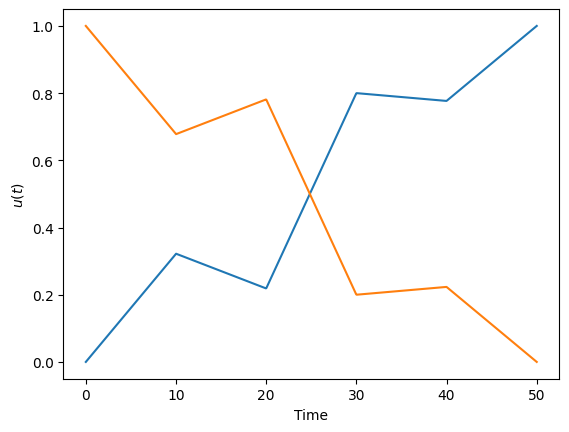

In [5]:
# visualization of paths

fig, ax = plt.subplots()

ts = np.linspace(0, t_total, 1000)

pars = optimizer.max['params']
pars.update({'T': t_total})

ax.plot(ts, [path(t, pars) for t in ts], label='$u(t)$')
ax.plot(ts, [1 - path(t, pars) for t in ts], label='$1-u(t)$')

ax.set_xlabel("Time")
ax.set_ylabel("$u(t)$")

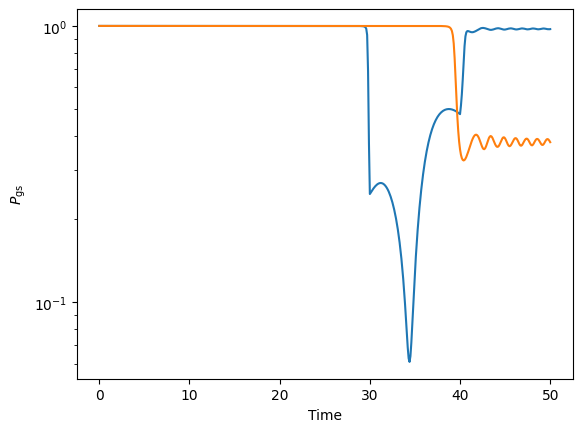

In [6]:
# getting the ground state probability along the path:

ts, pops = aqc.gs_population(paths, optimizer.max['params'], n_points=1000, verbose=False)

# and along the linear path

lp = linear_path()
linear_paths = [lp, lambda u, argument: 1 - lp(u, argument)]

ts, linear_pops = aqc.gs_population(linear_paths, {}, n_points=1000, verbose=False)

fig, ax = plt.subplots()

ax.plot(ts, pops, label='BO')
ax.plot(ts, linear_pops, label='Linear')


ax.set_xlabel("Time")
ax.set_ylabel("$P_{\mathrm{gs}}$")

ax.set_yscale("log");

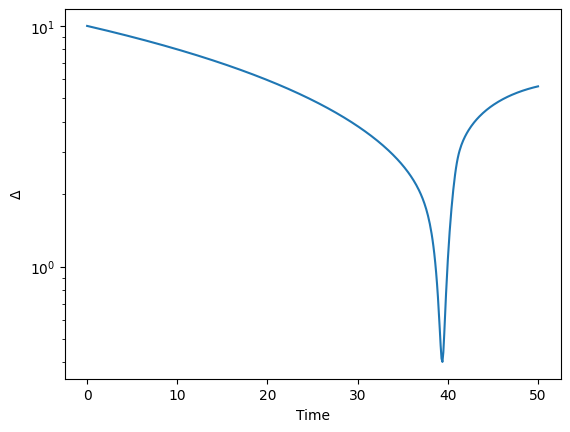

In [7]:
# Plotting the gap

gaps = [aqc.gap(t, linear_paths, {}) for t in ts]

fig, ax = plt.subplots()

ax.plot(ts, gaps)

ax.set_xlabel("Time")
ax.set_ylabel("$\Delta$")
ax.set_yscale("log");


### Reverse Annealing in the $p$-spin model

In [8]:
param_nrs = [2, 2]

aqc = AQC([pspin(nq, c), h_init(nq, c), gamma * v_tf(nq, c)],
         total_time=t_total, fom='overlap')

sr, lr = tuple(real_path(pn, i) for i, pn in enumerate(param_nrs))

paths_r = [sr,
           lambda u, argument: (1 - sr(u, argument)) * (1 - lr(u, argument)),
           lambda u, argument: (1 - sr(u, argument)) * lr(u, argument)]

optimizer = bo_realspace(aqc, paths_r, param_nrs, ip=nip, num_iter=niter, random_seed=seed,
            return_target=False, span=1, xi=0.05, decay_ratio=0.5)

|   iter    |  target   |    p00    |    p01    |    p10    |    p11    |
-------------------------------------------------------------------------
|  1        |  0.7952   |  0.3333   |  0.6667   |  0.3333   |  0.6667   |
|  2        |  0.5102   |  0.4643   |  0.5241   |  0.1512   |  0.7009   |
|  3        |  0.6068   |  0.4796   |  0.6154   |  0.6538   |  0.7899   |
|  4        |  0.3619   |  0.3206   |  0.5947   |  0.2288   |  0.8194   |
|  5        |  0.2578   |  0.2924   |  0.3731   |  0.2654   |  0.8253   |
|  6        |  0.4434   |  0.1217   |  0.4503   |  0.3544   |  0.6879   |
|  7        |  0.7394   |  0.4229   |  0.8996   |  0.483    |  0.7407   |
|  8        |  0.8548   |  0.4816   |  0.5486   |  0.2412   |  0.4855   |
|  9        |  0.9406   |  0.1958   |  0.754    |  0.0614   |  0.6225   |
|  10       |  0.9087   |  0.2872   |  0.6625   |  0.2839   |  0.5415   |
|  11       |  0.7226   |  0.09667  |  0.617    |  0.02101  |  0.6193   |
|  12       |  0.8273   |  0.3283   | 

In [9]:
print(f"Initial overlap: {optimizer.res[0]['target']}")
print(f"Best overlap: {optimizer.max['target']}")

Initial overlap: 0.7951840811806536
Best overlap: 0.9908629383636249


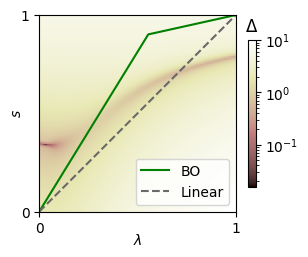

In [10]:
fig, ax = plt.subplots(figsize=(3.75 * 2.81 / 3.32, 3.75* 2.81 / 3.32))
ls = np.linspace(-0.5, 1.5, 200)
gaps = np.loadtxt("data/gaps_n30_g5_c8.txt")

t_total = 50
ts = np.linspace(0, t_total, 100)

popt = optimizer.max['params']
popt.update({'T': t_total})

xs = np.array([lr(t, popt) for t in ts])
ys = np.array([sr(t, popt) for t in ts])

xmin = np.argmin(np.abs(0 - ls)) - 1
xmax = np.argmin(np.abs(1-ls)) + 1
ymin = np.argmin(np.abs(0 - ls)) - 1
ymax = np.argmin(np.abs(1-ls)) + 1





im = ax.imshow(gaps.T[ymin:ymax, xmin:xmax], cmap='pink', origin='lower',
               extent=(0,1,0,1),
              norm=mpl.colors.LogNorm())

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
cb = fig.colorbar(im, shrink=0.6)
cb.ax.set_title(r'$\Delta$')

ax.plot(xs, ys, 'g-', label='BO')

ax.plot(np.linspace(0, 1), np.linspace(0, 1), color='dimgray', ls='--', label='Linear')



ax.set_xticks([0, 1])
ax.set_yticks([0, 1])



ax.legend(loc='lower right')



ax.set_ylabel('$s$', labelpad=-2.5)
ax.set_xlabel('$\lambda$', labelpad=-2.5)

plt.show()